**Взять датасет Mortality and Water Hardness**
https://www.kaggle.com/ukveteran/mortality-and-water-hardness

В этом датасете содержатся данные по средней годовой смертности на 100000 населения и концентрации кальция в питьевой воде для 61 большого города в Англии и Уэльсе. Города дополнительно поделены на северные и южные.

1. Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

        a. Построить точечный график
        b. Рассчитать коэффициенты корреляции Пирсона и Спирмена
        c. Построить модель линейной регрессии
        d. Рассчитать коэффициент детерминации
        e. Вывести график остатков

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('water.csv')
# data.drop('Unnamed: 0', axis = 1, inplace = True)
data

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
...,...,...,...,...,...
56,57,South,Walsall,1527,60
57,58,South,West Bromwich,1627,53
58,59,South,West Ham,1486,122
59,60,South,Wolverhampton,1485,81


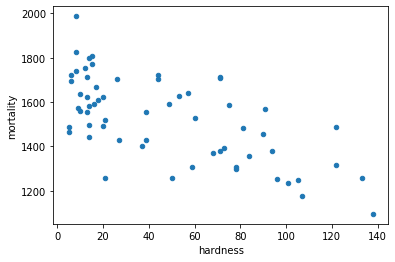

In [3]:
data.plot(kind='scatter', x='hardness', y='mortality')

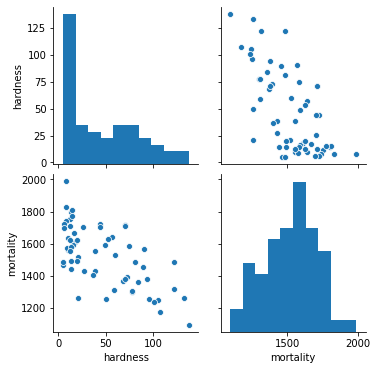

In [4]:
sns.pairplot(data[['hardness', 'mortality']])

Обратная корреляция - чем меньше концентрация кальция в воде тем выше смертность. 

In [5]:
data[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [6]:
data[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [7]:
data[['hardness', 'mortality']].corr(method='kendall')

,hardness,mortality
hardness,1.000000,-0.453753
mortality,-0.453753,1.000000


## Регрессия

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [9]:
X = data[['hardness']]
y = data['mortality']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
type(X_train)

pandas.core.frame.DataFrame

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
y_pred = model.predict(X_test)
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

In [14]:
model.score(X_test, y_test) # метод возвращает значение коэффициента детерминации

0.5046490611017092

зависимость слабая, коэфициент детерминации чуть более 50% спишем на то что очень мало данных и нет возможности рассмотреть зависимость от других данных, рассмотрим на графике:

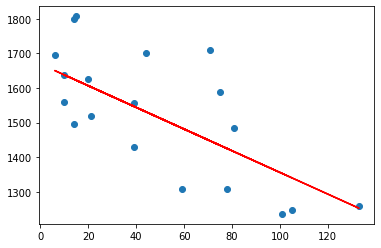

In [15]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

2. Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

        a. Разделить данные на 2 группы
        b. Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

## ЮГ - South

**расппределение**

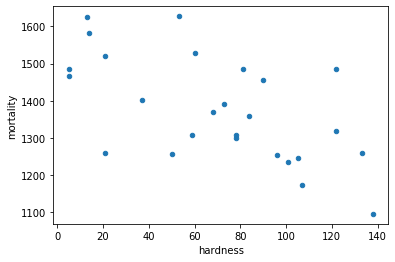

In [16]:
data[data.location == 'South'].plot(kind='scatter', x='hardness', y='mortality')

**коэффициенты корреляции**

In [17]:
data[data.location == 'South'][['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [18]:
data[data.location == 'South'][['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [19]:
data[data.location == 'South'][['hardness', 'mortality']].corr(method='kendall')

,hardness,mortality
hardness,1.000000,-0.440315
mortality,-0.440315,1.000000


**построение модели**

In [20]:
X_s = data[data.location == 'South'][['hardness']]
y_s = data[data.location == 'South']['mortality']

In [21]:
X_s_train, X_s_test, y_s_train, y_s_test = train_test_split(X_s, y_s, test_size=0.3, random_state=42)

In [22]:
model_s = LinearRegression()
model_s.fit(X_s_train, y_s_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
y_s_pred = model_s.predict(X_s_test)

In [24]:
model_s.score(X_s_test, y_s_test) # метод возвращает значение коэффициента детерминации

-2.5519223012352077

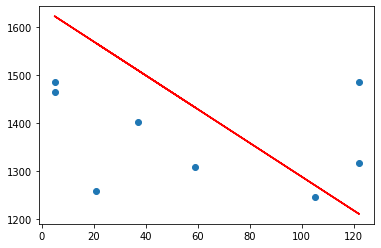

In [25]:
plt.scatter(X_s_test, y_s_test)
plt.plot(X_s_test, y_s_pred, c='r')

## СЕВЕР - North

**расппределение**

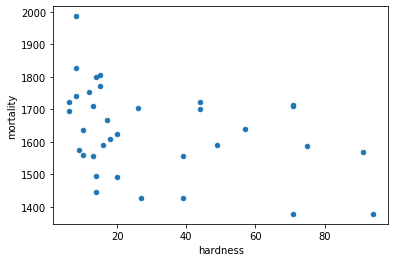

In [26]:
data[data.location != 'South'].plot(kind='scatter', x='hardness', y='mortality')

**коэффициенты корреляции**

In [27]:
data[data.location != 'South'][['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [28]:
data[data.location != 'South'][['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [29]:
data[data.location != 'South'][['hardness', 'mortality']].corr(method='kendall')

,hardness,mortality
hardness,1.000000,-0.283058
mortality,-0.283058,1.000000


**построение модели**

In [30]:
X_n = data[data.location != 'South'][['hardness']]
y_n = data[data.location != 'South']['mortality']

In [31]:
X_n_train, X_n_test, y_n_train, y_n_test = train_test_split(X_n, y_n, test_size=0.3, random_state=42)

In [32]:
model_n = LinearRegression()
model_n.fit(X_n_train, y_n_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
y_n_pred = model_n.predict(X_n_test)

In [34]:
model_n.score(X_n_test, y_n_test)

0.018885304285745863

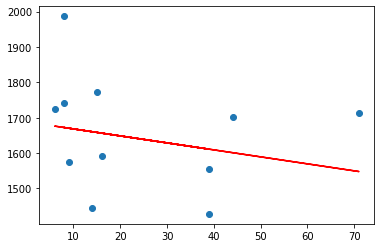

In [35]:
plt.scatter(X_n_test, y_n_test)
plt.plot(X_n_test, y_n_pred, c='r')

данных еще меньше, разброс данных еще больше, нет смысла рассматривать связи отдельно по северным и южным городам.